<a href="https://colab.research.google.com/github/violetafurculita/ML-AI-UC-Berkeley-Course/blob/main/Module_11_Price_of_Cars_notebook_Violeta_Furculita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

###  1. Business Understanding

**Prompt** : From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, we need to reframe the task as a data task with the appropriate technical vocabulary.

### **Solution**

####  **Problem Statement**

Our customers - used cars dealerships - want to have a better understanding of the factors that impact the price of a used car. To solve this problem we are given a dataset that contains car sales data in the United States and is our task to analyze the data, determine what features have a statistically significant impact on the price of a car.

####  **Goal**
Our goal is to use various machine learning models we have learned until now to predict car prices. From these we will make a recomendation on the model type to use for higher accuracy predictions and the features that have the highest impact on predicting car prices.

### 2. **Data Understanding**

**Prompt** : After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### **Solution**

To solve the above problem we need to start with understanding the data available to us.
To do so we will perform the following steps:
1. import the dataset and look at the current data set state
2. understand the data structure by looking at the number of features and their type. At this step we would also want to understand the data quality by looking at the count of missing values accross features
3. since we are tasked with predicting the price of the cars, we want to look at the price data and its quality (missing values)
4. below are the steps taken to better understand the dataset

##### Start by importing libraries to help us solve this problem

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import copy
from tabulate import tabulate
import matplotlib.pyplot as plt
from plotly.figure_factory import create_table
import plotly.express as px
from datetime import datetime
import seaborn as sns
from statsmodels.sandbox.stats.stats_mstats_short import edf_normal_inverse_transformed
from sklearn.preprocessing import QuantileTransformer, LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import warnings
warnings.filterwarnings("ignore")


In [2]:
#import the dataset to visualize it in original form
df = pd.read_csv('vehicles.csv')
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [3]:
#understand how many rows and columns the original dataframe contains
df.shape
print(df.shape)

(426880, 18)


In [4]:
# understand all the columns and features in the original dataframe
df.columns


Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [5]:
# understand the data type in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
#understand the mean and standard distribution for the dataframe in original format. We are seeking a mean of zero and a standard deviation of 1
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
# understand the columns with missing values (either non existent values or NaN values)
missing_vals = df.isnull().sum()/len(df)
missing_vals = pd.DataFrame(missing_vals, columns=["Missing Values"])

fig = px.bar(missing_vals, y="Missing Values", color_discrete_sequence=["lightblue"])

fig.update_layout(
  title="Missing Value Percentages by Column",
  yaxis_title="Missing Values (%)",
  xaxis_title="Columns",
  yaxis=dict(tickformat="0.2%")
)

fig.add_hline(y=0.05, line_dash="dash", line_color="green")

fig.show()

**Observation**


1.   This dataset misses a lot of data, specifically for featurs like Condition, Cylinders, Size, Drive, Type, Paint Color.
2. Column Size is missing more than 70% of its data and it is potentially unlikely that we can replace all those missing values
3. Column VIN misses close to 40% of its values. It is unlikely we need a car's VIN to determine its price and this columns seems a good candidate for removal from the data frame.
4. Columns Condition and Cylinders miss more than 40% of their resective data. .Both features seem important in determining a car's price so we will clean the missing values and retain both features.




### Data Preparation

**Prompt** - After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

#### **Solution**
**In the folowing steps we will clean the orignal data frame so we can visualize the data and determine if and how price is impacted by the other features in the dataset.**

In [8]:
#Make a copy of the original dataframe so we can start cleaning up the data
clean_df = df.copy()
clean_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [9]:
# Drop and reset the index
clean_df=clean_df.reset_index().drop(columns=['index'])

In [10]:
#Clean values that are outliers such as infinity and replace with NaN
clean_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
# Drop the rows with missing data
clean_df.dropna(inplace=True)

In [12]:
#Remove any duplicates from the dataframe
clean_df.drop_duplicates(inplace=True)

In [13]:
# Convert float values to integer values so we can use the data in training and testing in later stages
clean_df['odometer'] = clean_df['odometer'].apply(lambda x: int(x))

#Drop values of zero in the column 'Price'
clean_df.drop(clean_df[clean_df['price'] == 0].index,inplace=True)

In [14]:
#Drop columns that may not be relevant (id) or columns that miss most of their respective data (size)
clean_df.drop(columns=['id','size'], inplace=True)

In [15]:
#import datetime
from datetime import datetime
#Create a new column titled 'car_age' and convert the year column using the datetime feature and dropping the original Year column

# Convert year to datetime
clean_df['car_age'] = clean_df['year'].apply(lambda x: datetime.today().year - int(x))

#drop the year column as we created a new column titled "car_age"
clean_df.drop(columns=['year'], inplace=True)

In [16]:
clean_df.head()


,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,car_age
215,birmingham,4000,toyota,echo,excellent,4 cylinders,gas,155000,clean,automatic,JTDBT123520243495,fwd,sedan,blue,al,22
219,birmingham,2500,bmw,525i,fair,6 cylinders,gas,110661,clean,automatic,WBAHD6322SGK86772,rwd,sedan,white,al,29
268,birmingham,9000,mazda,miata mx-5,excellent,4 cylinders,gas,56700,clean,automatic,JM1NC25F570128735,rwd,convertible,white,al,16
337,birmingham,8950,ford,f-150,excellent,6 cylinders,gas,164000,clean,automatic,1FTMF1CM6BKD55331,fwd,truck,white,al,13
338,birmingham,4000,mercedes-benz,benz,fair,6 cylinders,gas,88100,clean,automatic,1.14023E+13,rwd,coupe,silver,al,52


**Now that we have cleaned and preprocessed the data, let's take a look at some visual representations of the data, specifically the relationship between Price and other features.**

Create categorical bar plots using Seaborn to visualize the relationships between Price and other features


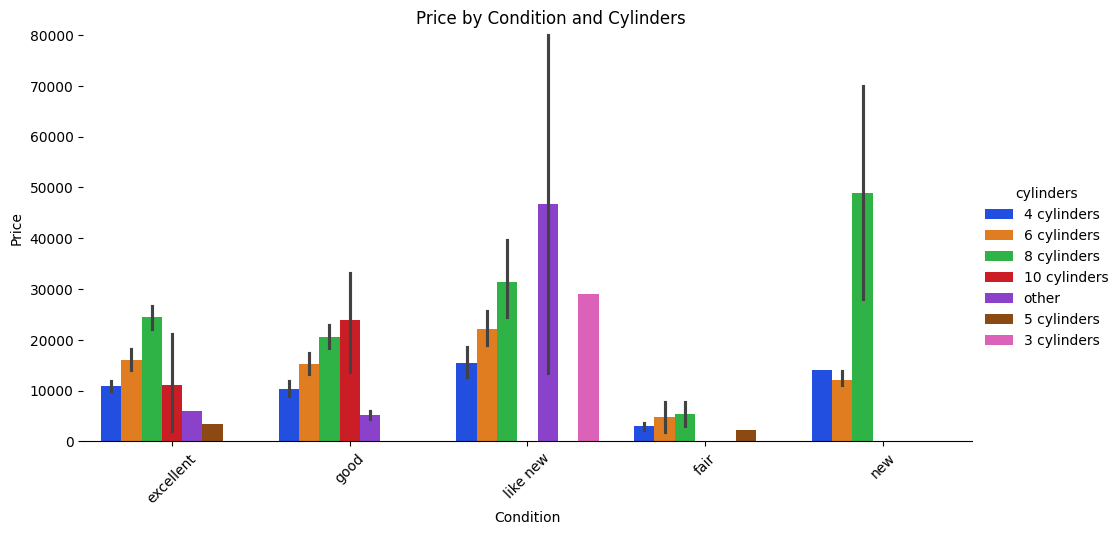

In [17]:
pal = sns.color_palette("bright", n_colors=len(clean_df["cylinders"].unique()))

g = sns.catplot(x="condition", y="price", hue="cylinders",
                 data=clean_df.sample(1000), kind="bar",
                 aspect=2, height=5, palette=pal)

g.set_xticklabels(rotation=45)

g.set_axis_labels("Condition", "Price")
g.fig.suptitle("Price by Condition and Cylinders")

g.set_xticklabels(rotation=45)
g.despine(left=True)


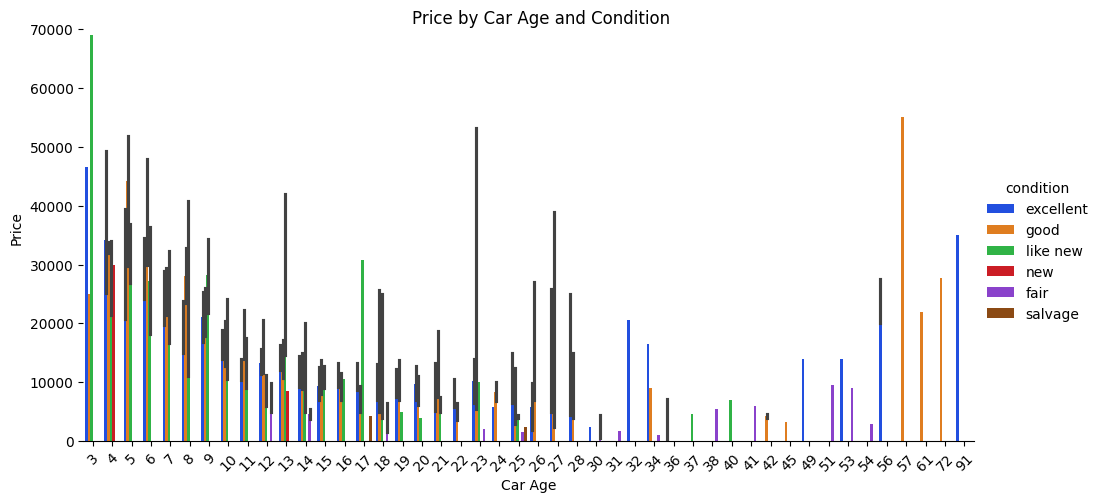

In [18]:
pal = sns.color_palette("bright", n_colors=len(clean_df["condition"].unique()))

g = sns.catplot(x="car_age", y="price", hue="condition",
                 data=clean_df.sample(1000), kind="bar",
                 aspect=2, height=5, palette=pal)

g.set_xticklabels(rotation=45)

g.set_axis_labels("Car Age", "Price")
g.fig.suptitle("Price by Car Age and Condition")

g.set_xticklabels(rotation=45)
g.despine(left=True)


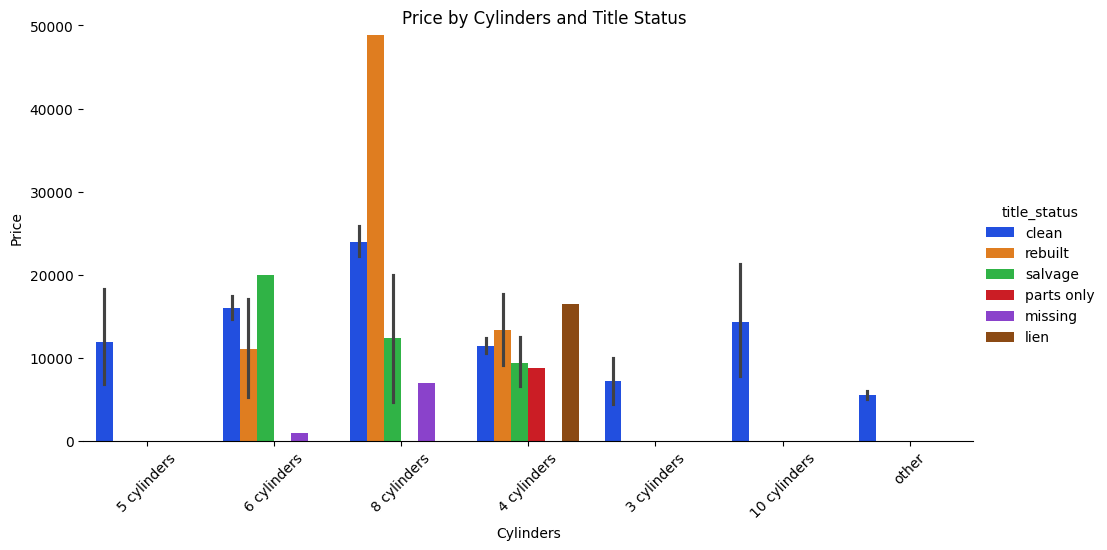

In [19]:
pal = sns.color_palette("bright", n_colors=len(clean_df["title_status"].unique()))

g = sns.catplot(x="cylinders", y="price", hue="title_status",
                 data=clean_df.sample(1000), kind="bar",
                 aspect=2, height=5, palette=pal)

g.set_xticklabels(rotation=45)

g.set_axis_labels("Cylinders", "Price")
g.fig.suptitle("Price by Cylinders and Title Status")

g.set_xticklabels(rotation=45)
g.despine(left=True)

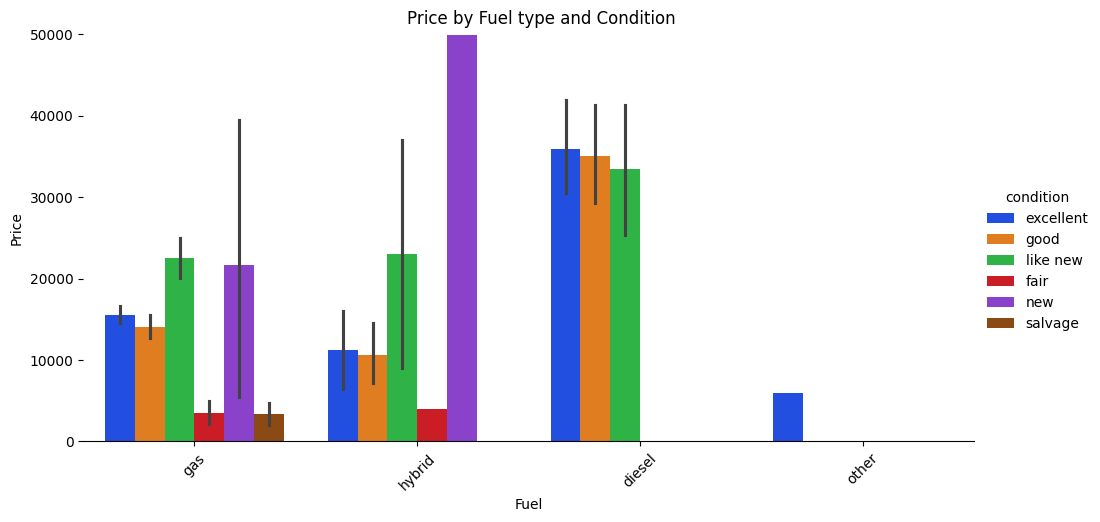

In [20]:
pal = sns.color_palette("bright", n_colors=len(clean_df["condition"].unique()))

g = sns.catplot(x="fuel", y="price", hue="condition",
                 data=clean_df.sample(1000), kind="bar",
                 aspect=2, height=5, palette=pal)

g.set_xticklabels(rotation=45)

g.set_axis_labels("Fuel", "Price")
g.fig.suptitle("Price by Fuel type and Condition")

g.set_xticklabels(rotation=45)
g.despine(left=True)

In [21]:
counts = clean_df['state'].value_counts()[:10]

table = pd.DataFrame({'State': counts.index,
                      'Cars Inventory': counts.values}).set_index('State')

print(tabulate(table, headers='keys', tablefmt='fancy_grid'))

╒═════════╤══════════════════╕
│ State   │   Cars Inventory │
╞═════════╪══════════════════╡
│ fl      │             3398 │
├─────────┼──────────────────┤
│ ca      │             3332 │
├─────────┼──────────────────┤
│ ny      │             1722 │
├─────────┼──────────────────┤
│ tx      │             1299 │
├─────────┼──────────────────┤
│ mi      │             1222 │
├─────────┼──────────────────┤
│ wi      │             1111 │
├─────────┼──────────────────┤
│ nc      │             1094 │
├─────────┼──────────────────┤
│ oh      │             1033 │
├─────────┼──────────────────┤
│ ia      │             1030 │
├─────────┼──────────────────┤
│ pa      │             1000 │
╘═════════╧══════════════════╛


**Observation**
According to the dataframe, Florida, California, New York and Texas have the largest car inventories

In [22]:
means = (clean_df.groupby('manufacturer')['price'].mean().to_frame()).sort_values(by=['price'], ascending=False)[:10]

print(tabulate(means,headers='keys',tablefmt='fancy_grid'))

╒════════════════╤═════════╕
│ manufacturer   │   price │
╞════════════════╪═════════╡
│ ferrari        │ 95829.4 │
├────────────────┼─────────┤
│ aston-martin   │ 57280   │
├────────────────┼─────────┤
│ tesla          │ 41423.6 │
├────────────────┼─────────┤
│ porsche        │ 31622.5 │
├────────────────┼─────────┤
│ ram            │ 27380.3 │
├────────────────┼─────────┤
│ gmc            │ 24450.8 │
├────────────────┼─────────┤
│ alfa-romeo     │ 23893.1 │
├────────────────┼─────────┤
│ rover          │ 23731.1 │
├────────────────┼─────────┤
│ ford           │ 21871.8 │
├────────────────┼─────────┤
│ chevrolet      │ 19272.9 │
╘════════════════╧═════════╛


**Observation**
According to the data frame the most expensive cars in the data frame are made by Ferrari, Aston Martin, Tesla and Porsche.

In [23]:
paint= (clean_df.groupby('paint_color')['price'].mean().to_frame()).sort_values(by=['price'],  ascending=False).head(10)
print(tabulate(paint,headers='keys',tablefmt='fancy_grid'))

╒═══════════════╤═════════╕
│ paint_color   │   price │
╞═══════════════╪═════════╡
│ white         │ 20553.4 │
├───────────────┼─────────┤
│ black         │ 18219.9 │
├───────────────┼─────────┤
│ orange        │ 18201.5 │
├───────────────┼─────────┤
│ red           │ 17076.3 │
├───────────────┼─────────┤
│ custom        │ 15580   │
├───────────────┼─────────┤
│ yellow        │ 15414.5 │
├───────────────┼─────────┤
│ grey          │ 15130.4 │
├───────────────┼─────────┤
│ blue          │ 14115.2 │
├───────────────┼─────────┤
│ silver        │ 13502.4 │
├───────────────┼─────────┤
│ brown         │ 13345.4 │
╘═══════════════╧═════════╛


**Observation**
According to the dataframe the cars in color white, black, orange and red have higher prices as compared to other colors.

**Now we will encode the data so we can advance to the modeling step**

In [24]:
#Encode the data to prepare it for modeling
le = LabelEncoder()

for column in clean_df.select_dtypes(include='object').columns:
    clean_df[column] = le.fit_transform(clean_df[column])

#create new dataframe to be encoded as a copy of the clean dataframe
encode_df = clean_df.copy()

encode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32496 entries, 215 to 426833
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   region        32496 non-null  int64
 1   price         32496 non-null  int64
 2   manufacturer  32496 non-null  int64
 3   model         32496 non-null  int64
 4   condition     32496 non-null  int64
 5   cylinders     32496 non-null  int64
 6   fuel          32496 non-null  int64
 7   odometer      32496 non-null  int64
 8   title_status  32496 non-null  int64
 9   transmission  32496 non-null  int64
 10  VIN           32496 non-null  int64
 11  drive         32496 non-null  int64
 12  type          32496 non-null  int64
 13  paint_color   32496 non-null  int64
 14  state         32496 non-null  int64
 15  car_age       32496 non-null  int64
dtypes: int64(16)
memory usage: 4.2 MB


**Notice that our cleaned up and encoded data frame has 32,496 rows and 15 columns. None of the columns miss any data.**

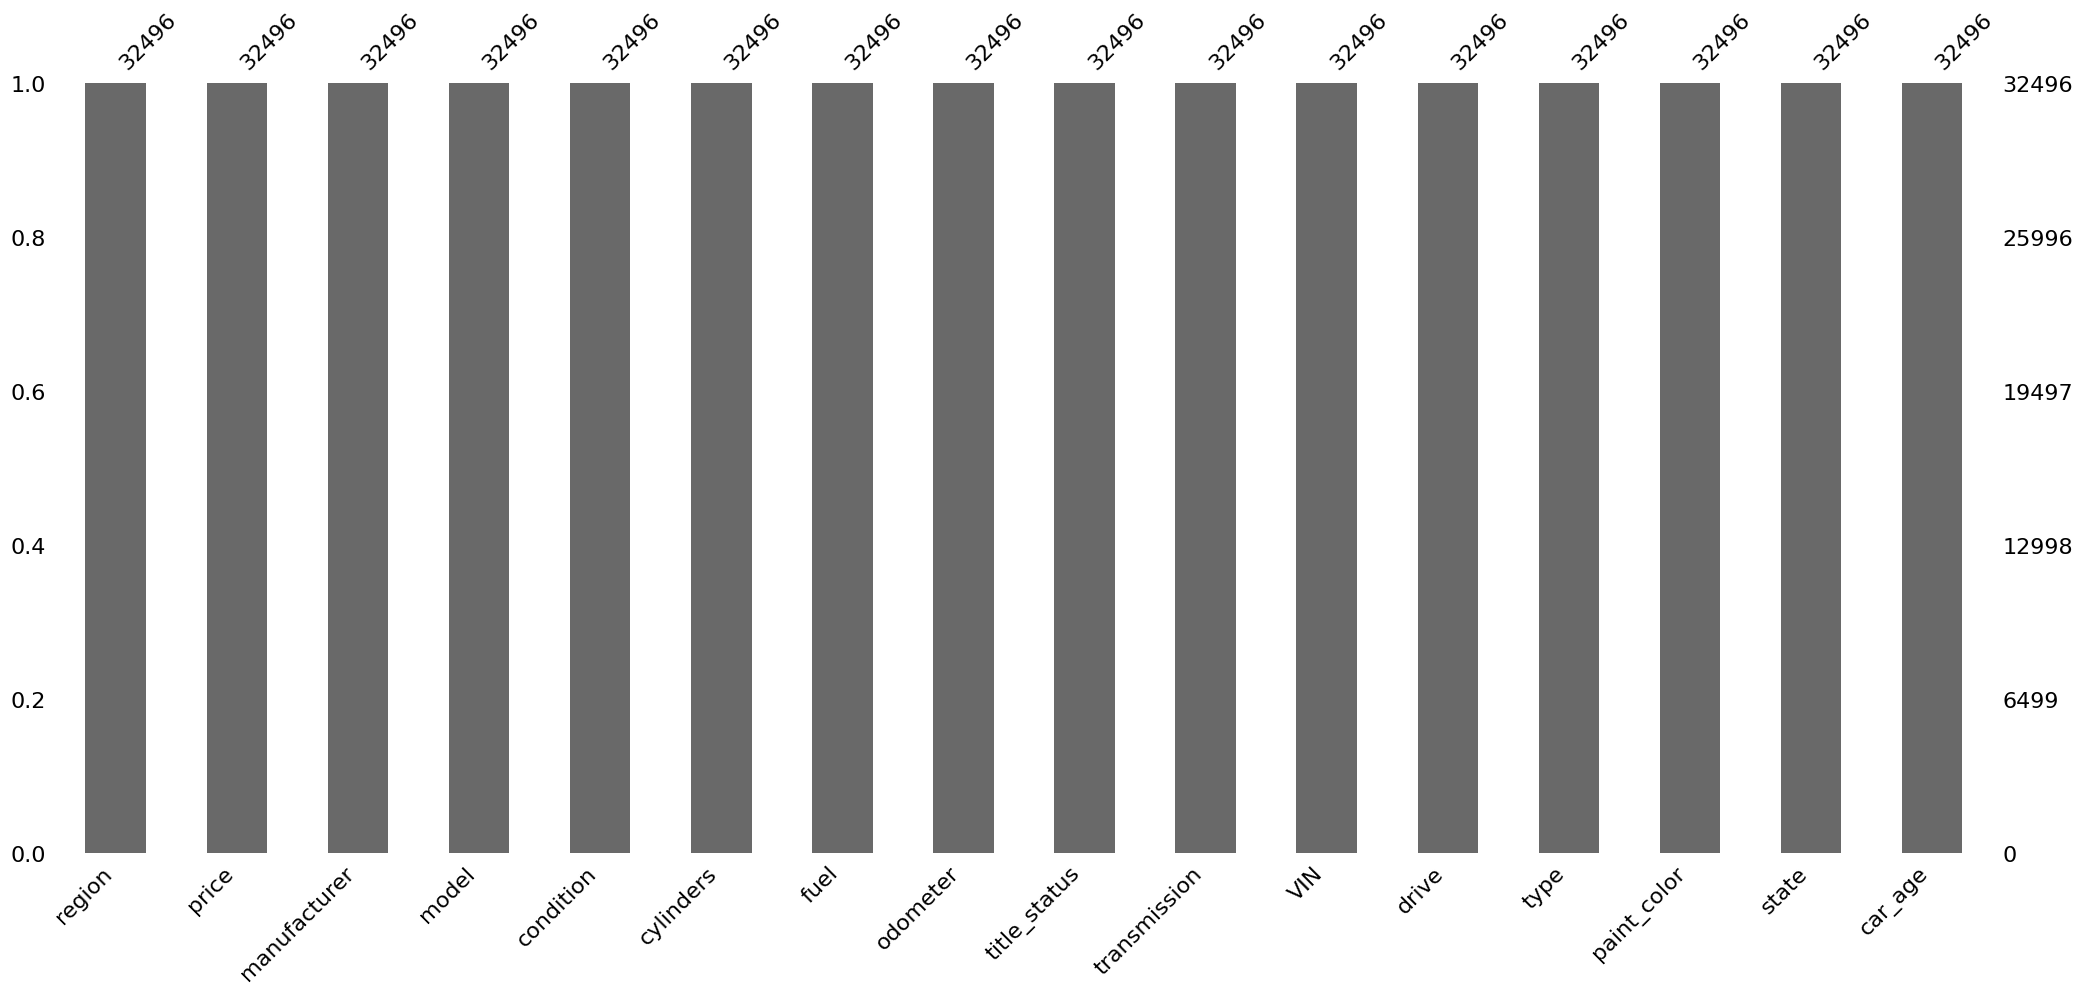

In [25]:
msno.bar(encode_df);


**Observation**
The encoded data frame contains numerical values for all original categorical values and is now ready for modeling.

####**Now using the cleaned up dataframe let's take a look at the correlation between price and other features**


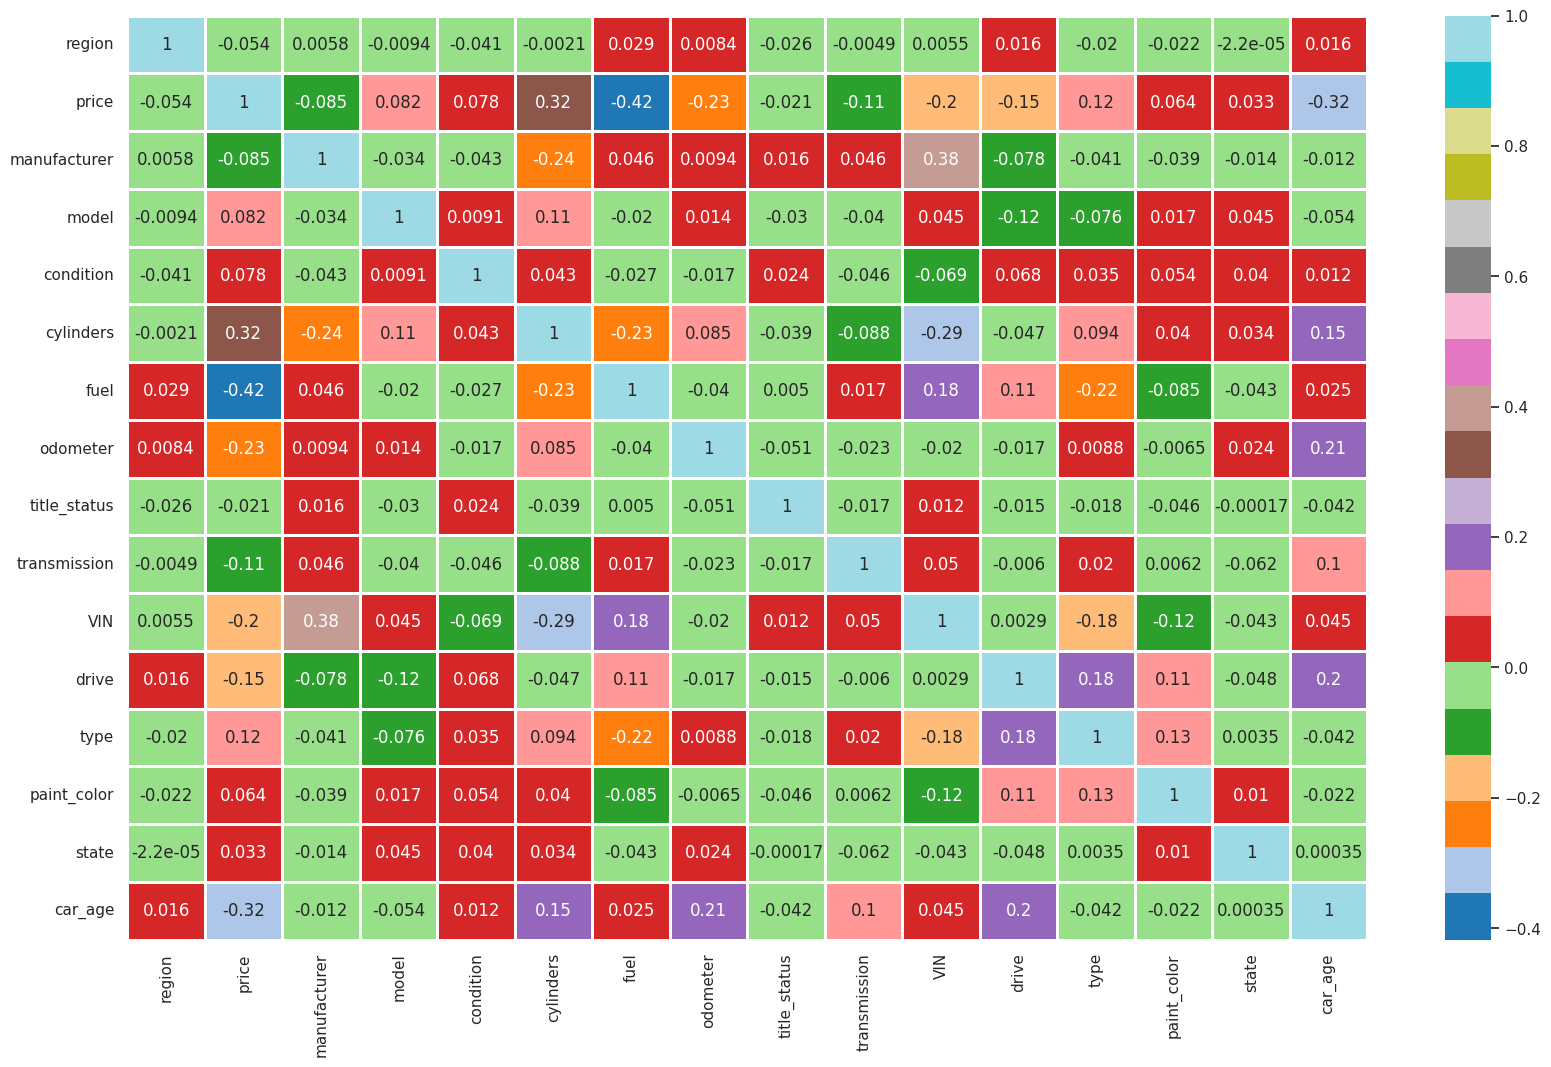

In [26]:
# Calculate the correlation matrix
correlation_matrix = encode_df.corr()

# Configure the heatmap
sns.set_theme(style="white")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create and show the heatmap
f, ax = plt.subplots(figsize=(20, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
annot = True
sns.heatmap(correlation_matrix,annot=annot,cmap="tab20", linewidths=2, linecolor='white')
plt.show()

#### **Observation**
From the above correlation heatmap we observe the following:


*   Price has a positive (0.32) correlation with the number of cylinders a car has
*   Price has a negative (-0.32) correlation with the car age
*   Price has a negative ( -0.42) correlation with fuel
*   We do not notice any features that have a correlation higher than 0.7 with the Price feature to make them candidates for removal, as such we will keep all features in the dataset
*   We will use any feature with correlation equal to or greater than 0.1 in the initial model to train and test





### Modeling

**Prompt** - With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

##### **Solution**

**We will perform the following steps**:

1.   **Split the data into Training set and Test set**
2.   **Scale the data**
3.   **Build and run Linear Regression, Ridge Regression, Lasso Regression and test to determine the best model**
4. **Use measures of model accuracy such asR sq, Adj R sq, MSE, RMSE, MAE and training score and test score to determine the best model for predicting price.**

**To start we are calling in specific features we identified in the correlation matrix above. As discussed we will call features that have a correlation with price of 0.1 or greater, irrespective of the sign.**

**We will split the data into a 70/30 split between training set and test set. This shall offer enough data to run predictions and generate any visuals to present our work.**

**We will run Linear Regression, Ridge Regression and Lasso Regression and comare their results.The table and plot below shall offer a visual represtation of model performance.**


**Build and run Linear Regression, Ridge Regression and Lasso Regression on the training and test dataset**

In [27]:
# Identify the feature that will be predicted, in our case - Price
X = encode_df[['cylinders', 'fuel','odometer', 'transmission', 'drive', 'type','car_age']]
y = encode_df['price']

#Scale the entire dataframe before spliting
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into a training set(70% of data) and a testing set(30% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#define the model metrics and run the models

def evaluate_models(models, X_train, y_train, X_test, y_test):

  scores = pd.DataFrame(columns=['Model', 'R2','Adj R2', 'MSE', 'MAE',
                                  'Train Score', 'Test Score'])
  str_models = []
  for name, model in models.items():

    model= model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    str_models.append(str(name))

    scores = scores.append({
      'Model': name,
      'R2': r2_score(y_test, y_pred),
      'Adj R2': 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),
      'MSE': mean_squared_error(y_test, y_pred),
      'MAE': mean_absolute_error(y_test, y_pred),
      'Train Score': model.score(X_train, y_train),
      'Test Score': model.score(X_test, y_test)
    }, ignore_index=True)

  num_samples = 100

  fig = px.line(
  x=range(num_samples),
  y=[y_test[:num_samples], y_pred[:num_samples]],
  labels={"x": "Observation Count", "y": "Price"}
  )

  fig.update_layout(
  title= f"Car Prices: Actual vs.Predicted using {str(name)}",
  yaxis_title="Price",
  xaxis_title="Observation Count",
  legend_title="Legend"
  )

  fig.data[0].name = "Actual"
  fig.data[1].name = "Predicted"

  fig.show()
  return scores

models = {'LinearRegression': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso()}

scores = evaluate_models(models, X_train, y_train, X_test, y_test)

print(tabulate(scores, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════╤══════════╤══════════╤═════════════╤═════════╤═══════════════╤══════════════╕
│    │ Model            │       R2 │   Adj R2 │         MSE │     MAE │   Train Score │   Test Score │
╞════╪══════════════════╪══════════╪══════════╪═════════════╪═════════╪═══════════════╪══════════════╡
│  0 │ LinearRegression │ 0.365627 │ 0.365171 │ 1.10405e+08 │ 6889.08 │      0.405798 │     0.365627 │
├────┼──────────────────┼──────────┼──────────┼─────────────┼─────────┼───────────────┼──────────────┤
│  1 │ Ridge            │ 0.365629 │ 0.365174 │ 1.10405e+08 │ 6889.15 │      0.405798 │     0.365629 │
├────┼──────────────────┼──────────┼──────────┼─────────────┼─────────┼───────────────┼──────────────┤
│  2 │ Lasso            │ 0.36565  │ 0.365194 │ 1.10401e+08 │ 6889.43 │      0.405798 │     0.36565  │
╘════╧══════════════════╧══════════╧══════════╧═════════════╧═════════╧═══════════════╧══════════════╛


**Observation**


1.   **The overall predictive performance of the 3 models ran is fairly weak. This may be attributed to the quality of the original data and the features selected for prediction. In the evaluation stage we will further fine tune the models to see if we can improve performance.**
2.  **R and Adj R2 is similar and fairly moderate which showcases that we did not overfit this model, a positive factor.**
3. **The RMSE or root mean square deviation is the factor that showcases that our model can predict car prices with an absolute USD value of plus/minus of USD 6000. This is quite a significant error rate, specifically for cars that cost less than USD 40k.**




### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**In this step we will finetuning our models, specifically:**


1.   **Add more features to the initial set and see if that affects models scores**
2.   **For each new feature added we will run the models via traina nd test stage and check the accuracy scores and compared to the initial model**
3. **After adding all features with a correlation of 0.1 or greater to the models, we will run train and test with all features, to see how that can improve accuracy.**
4. **After finetunning we will select a random sample of 10 cars to predict their price using our model.**


In [28]:
# Identify the feature that will be predicted, in our case - Price
X = encode_df[['cylinders','manufacturer', 'model', 'fuel','odometer', 'transmission', 'drive', 'type','car_age']]
y = encode_df['price']

#Scale the entire dataframe before spliting
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into a training set(70% of data) and a testing set(30% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#define the model metrics and run the models

def evaluate_models(models, X_train, y_train, X_test, y_test):

  scores = pd.DataFrame(columns=['Model', 'R2','Adj R2', 'MSE', 'MAE',
                                  'Train Score', 'Test Score'])
  str_models = []
  for name, model in models.items():

    model= model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    str_models.append(str(name))

    scores = scores.append({
      'Model': name,
      'R2': r2_score(y_test, y_pred),
      'Adj R2': 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),
      'MSE': mean_squared_error(y_test, y_pred),
      'MAE': mean_absolute_error(y_test, y_pred),
      'Train Score': model.score(X_train, y_train),
      'Test Score': model.score(X_test, y_test)
    }, ignore_index=True)

  num_samples = 100

  fig = px.line(
  x=range(num_samples),
  y=[y_test[:num_samples], y_pred[:num_samples]],
  labels={"x": "Observation Count", "y": "Price"}
  )

  fig.update_layout(
  title= f"Car Prices: Actual vs.Predicted using {str(name)}",
  yaxis_title="Price",
  xaxis_title="Observation Count",
  legend_title="Legend"
  )

  fig.data[0].name = "Actual"
  fig.data[1].name = "Predicted"

  fig.show()
  return scores

models = {'LinearRegression': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso()}

scores = evaluate_models(models, X_train, y_train, X_test, y_test)

print(tabulate(scores, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════╤══════════╤══════════╤═════════════╤═════════╤═══════════════╤══════════════╕
│    │ Model            │       R2 │   Adj R2 │         MSE │     MAE │   Train Score │   Test Score │
╞════╪══════════════════╪══════════╪══════════╪═════════════╪═════════╪═══════════════╪══════════════╡
│  0 │ LinearRegression │ 0.36627  │ 0.365685 │ 1.10293e+08 │ 6879.07 │      0.406379 │     0.36627  │
├────┼──────────────────┼──────────┼──────────┼─────────────┼─────────┼───────────────┼──────────────┤
│  1 │ Ridge            │ 0.366273 │ 0.365687 │ 1.10293e+08 │ 6879.14 │      0.406379 │     0.366273 │
├────┼──────────────────┼──────────┼──────────┼─────────────┼─────────┼───────────────┼──────────────┤
│  2 │ Lasso            │ 0.366293 │ 0.365707 │ 1.10289e+08 │ 6879.43 │      0.406379 │     0.366293 │
╘════╧══════════════════╧══════════╧══════════╧═════════════╧═════════╧═══════════════╧══════════════╛


**Observation**

**As we can see from the above, performance has improved slightly as compared to the orognal model.
Next we will run our models with all the dataframe features.**

In [29]:
# Identify the feature that will be predicted, in our case - Price
X = encode_df.drop('price', axis = 1)
y = encode_df['price']

#Scale the entire dataframe before spliting
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into a training set(70% of data) and a testing set(30% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#define the model metrics and run the models
def evaluate_models(models, X_train, y_train, X_test, y_test):

  scores = pd.DataFrame(columns=['Model', 'R2','Adj R2', 'MSE', 'MAE',
                                  'Train Score', 'Test Score'])
  str_models = []
  for name, model in models.items():

    model= model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    str_models.append(str(name))

    scores = scores.append({
      'Model': name,
      'R2': r2_score(y_test, y_pred),
      'Adj R2': 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),
      'MSE': mean_squared_error(y_test, y_pred),
      'MAE': mean_absolute_error(y_test, y_pred),
      'Train Score': model.score(X_train, y_train),
      'Test Score': model.score(X_test, y_test)
    }, ignore_index=True)

  num_samples = 100

  fig = px.line(
  x=range(num_samples),
  y=[y_test[:num_samples], y_pred[:num_samples]],
  labels={"x": "Observation Count", "y": "Price"}
  )

  fig.update_layout(
  title= f"Car Prices: Actual vs.Predicted using {str(name)}",
  yaxis_title="Price",
  xaxis_title="Observation Count",
  legend_title="Legend"
  )

  fig.data[0].name = "Actual"
  fig.data[1].name = "Predicted"

  fig.show()
  return scores

models = {'LinearRegression': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso()}

scores = evaluate_models(models, X_train, y_train, X_test, y_test)

print(tabulate(scores, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════╤══════════╤══════════╤═════════════╤═════════╤═══════════════╤══════════════╕
│    │ Model            │       R2 │   Adj R2 │         MSE │     MAE │   Train Score │   Test Score │
╞════╪══════════════════╪══════════╪══════════╪═════════════╪═════════╪═══════════════╪══════════════╡
│  0 │ LinearRegression │ 0.372965 │ 0.371999 │ 1.09128e+08 │ 6835.09 │      0.413462 │     0.372965 │
├────┼──────────────────┼──────────┼──────────┼─────────────┼─────────┼───────────────┼──────────────┤
│  1 │ Ridge            │ 0.372968 │ 0.372001 │ 1.09128e+08 │ 6835.15 │      0.413462 │     0.372968 │
├────┼──────────────────┼──────────┼──────────┼─────────────┼─────────┼───────────────┼──────────────┤
│  2 │ Lasso            │ 0.372991 │ 0.372025 │ 1.09124e+08 │ 6835.45 │      0.413462 │     0.372991 │
╘════╧══════════════════╧══════════╧══════════╧═════════════╧═════════╧═══════════════╧══════════════╛


**Observation**

**Based on the models ran, we notice that running the Lasso model with all features produces the highest performance as compared to running specific features that have a correlation greater than +-0.1 with price.**

### **Deployment**

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

###**Assumptions and Considerations**


**The models trained and tested produced low predictive accuracy and
they shall not be used in this state. Other models and an ensemble of models shall be considered to achieve an accuracy rate of at least 90% before the models could be used by the client.**




### **Recommendations to our clients**



1.   Car prices are impacted by car age. New Cars and Old cars in great condition command the highest prices. Add in your inventory New and Vintage Cars in great conditions (new, like new, excellent).
2.   Car prices are impacted by their horse power. Cars with the number of cylinders greater than 6 in new, like new and excellent condition command high prices. Add to your inventory more cars with higher horse power.
3. Cars running on Diesel and Electricity command higher prices.
4. Cars with 8 cylinders and greater with title status as rebuild command a high price. These cars may fall in the vintage category.
5. Florida, California, New York and Texas have the highest car inventory.
6. Ferrari, Aston Martin, Tesla and Porsche are the priciest cars in the inventory.
7. White, black, orange, red and custom are the most expensive car colors.
